### Disclaimer: 
The data used and the problem statement is taken from [this Kaggle competition](https://www.kaggle.com/c/summeranalytics2020).

Code written by [Utkarsh Chaturvedi](https://www.linkedin.com/in/utkarshc99/).

# ***Importing basic libraries***
We shall import more as and when necessary.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import decomposition
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/test.csv
/kaggle/input/train.csv


In [3]:
train = pd.read_csv("/input/train.csv")
test = pd.read_csv("/input/test.csv")

Now to actually see what the dataset columns look like. We shall also look for missing values, if any, and take necessary steps to fix that issue.

In [4]:
pd.set_option('max_columns', None)
train.describe(include = 'all')

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,1628.000000,1628.000000,1628.000000,1628,1628,1628.000000,1628.000000,1628,1628.000000,1628.000000,1628,1628.000000,1628,1628.000000,1628,1628.000000,1628.000000,1628,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0
unique,NaN,NaN,NaN,3,3,NaN,NaN,6,NaN,NaN,2,NaN,9,NaN,3,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,NaN,Sales Executive,NaN,Married,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1105,979,NaN,NaN,623,NaN,NaN,996,NaN,365,NaN,681,NaN,NaN,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,814.500000,35.645577,0.482187,NaN,NaN,9.735258,2.884521,NaN,1000.985872,2.646192,NaN,2.650491,NaN,2.639435,NaN,5785.524570,2.761671,NaN,15.207617,3.155405,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0
std,470.107435,9.481794,0.499836,NaN,NaN,8.306546,1.020470,NaN,585.417694,1.125283,NaN,0.736330,NaN,1.096272,NaN,4339.293147,2.549995,NaN,3.686703,0.362402,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0
min,1.000000,18.000000,0.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN,1009.000000,0.000000,NaN,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,407.750000,29.000000,0.000000,NaN,NaN,2.000000,2.000000,NaN,509.250000,2.000000,NaN,2.000000,NaN,2.000000,NaN,2625.000000,1.000000,NaN,12.000000,3.000000,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0
50%,814.500000,34.000000,0.000000,NaN,NaN,8.000000,3.000000,NaN,977.000000,3.000000,NaN,3.000000,NaN,3.000000,NaN,4304.000000,2.000000,NaN,14.000000,3.000000,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0
75%,1221.250000,42.000000,1.000000,NaN,NaN,15.000000,4.000000,NaN,1494.000000,4.000000,NaN,3.000000,NaN,4.000000,NaN,7124.250000,4.000000,NaN,18.000000,3.000000,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0


There seem to be no missing values in any of the columns, which is a good sign. A couple of columns are useless from the outset, like 'Id' and 'Behaviour', but we'll take care of those later.

For now, we'll look at categorical variables.

In [5]:
cat_train = train.select_dtypes(include = 'object')
count = 0
for i in (cat_train.columns):
    print(cat_train.columns[count], ': ', cat_train[i].unique())
    print('\n--------------------------\n')
    count += 1

BusinessTravel :  ['Non-Travel' 'Travel_Rarely' 'Travel_Frequently']

--------------------------

Department :  ['Research & Development' 'Sales' 'Human Resources']

--------------------------

EducationField :  ['Medical' 'Life Sciences' 'Other' 'Marketing' 'Technical Degree'
 'Human Resources']

--------------------------

Gender :  ['Female' 'Male']

--------------------------

JobRole :  ['Laboratory Technician' 'Manufacturing Director' 'Sales Executive'
 'Research Scientist' 'Sales Representative' 'Healthcare Representative'
 'Research Director' 'Human Resources' 'Manager']

--------------------------

MaritalStatus :  ['Single' 'Married' 'Divorced']

--------------------------

OverTime :  ['No' 'Yes']

--------------------------



# ***Encoding categorical variables***

In [6]:
cat_replace = {'OverTime': {'No': 0, 'Yes': 1}}
train.replace(cat_replace, inplace = True)

In [7]:
obj = train.dtypes == 'object'
obj_cols = list(obj[obj].index)
# train_ohe_cols = pd.DataFrame(one_hot.fit_transform(train[obj_cols])) 

encoded = pd.DataFrame()
temp = pd.DataFrame()
for col in obj_cols:
    temp = pd.get_dummies(train[col], prefix = col)
    encoded[temp.columns] = temp

# train_ohe_cols.index = train.index
train_ohe = pd.concat([train, encoded], axis = 1)
train_encoded = train_ohe.drop(obj_cols, axis = 1)
train_encoded.head()

,Id,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,30,0,2,3,571,3,3,4,2564,0,0,14,3,0,12,2,11,7,6,7,4,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,36,0,12,4,1614,3,3,3,4663,9,1,12,3,2,7,2,3,2,1,1,2,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,3,55,1,2,1,842,3,3,4,5160,4,0,16,3,0,12,3,9,7,7,3,5,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,4,39,0,24,1,2014,1,3,4,4108,7,0,13,3,0,18,2,7,7,1,7,4,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,5,37,0,3,3,689,3,3,3,9434,1,0,15,3,1,10,2,10,7,7,8,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


# ***Finding correlation of features***

54

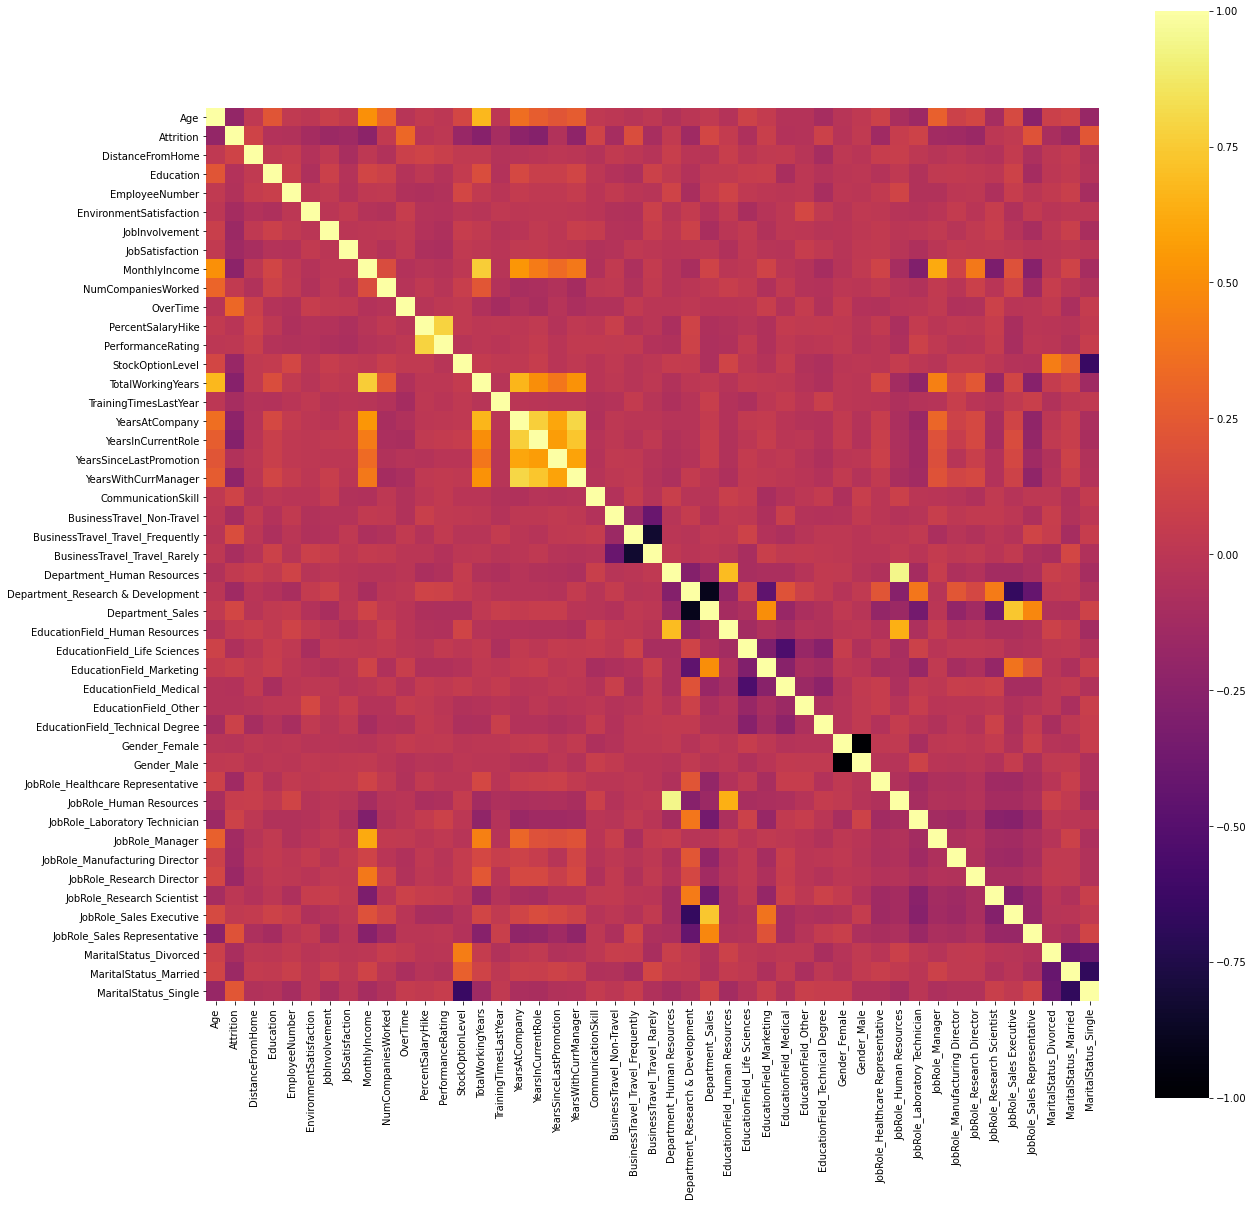

In [8]:
cm = train_encoded.drop(['Id', 'Behaviour'], axis = 1).corr()

plt.figure(figsize = (20, 20))
sns.heatmap(cm, square = True, xticklabels = True, yticklabels = True, cmap = 'inferno')

correlated = []
for i in range(len(cm.index)):
    for j in range(len(cm.columns)):
        if np.abs((cm.iloc[i, j])) >= 0.5 and i != j:
            correlated.append((cm.index[i], cm.columns[j], cm.iloc[i, j]))
            
len(correlated)


# ***Applying PCA for dimensionality reduction***

We see that a bunch of columns are related (either positively or negatively). Using PCA (with 99% variance retention) should automatically solve this issue, without us having to bother about individual correlations. 
However, this will not give us a proper idea of which features are more important than the others to the prediction. 

In [9]:
train_encoded.drop(['Id', 'Behaviour'], axis = 1, inplace = True)

In [10]:
# selecting features to scale. This includes all numerical features that aren't ordinal in nature:
features = ['Age', 'EmployeeNumber','DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 
                    'TotalWorkingYears', 'YearsAtCompany','YearsInCurrentRole', 
                    'YearsSinceLastPromotion','YearsWithCurrManager', 'TrainingTimesLastYear']

from sklearn.preprocessing import StandardScaler

# scaling the entire training dataset now:
ss_final = StandardScaler()

train_std = train_encoded[features]
train_std = pd.DataFrame(ss_final.fit_transform(train_std))
train_std_full = pd.concat([train_std, train_encoded.drop(features, axis = 1)], axis = 1)

from sklearn.decomposition import PCA

pca_check = PCA(whiten = True)
pca_check.n_components = 46
pca_check.fit_transform(train_std_full.drop('Attrition', axis = 1))
var_retention = pca_check.explained_variance_ratio_.cumsum()
print("var_retention: ", var_retention, "\n ---------------------------------------------------------------------------------------------")

# pulling least value of k for which variance retention is 99% or close
for i in range(len(var_retention)):
    if var_retention[i] >= 0.98:
        print(i, ", ", var_retention[i])

full_tgt = train_std_full.Attrition
train_std_full.drop('Attrition', axis = 1, inplace = True)

var_retention:  [0.18783425 0.27618804 0.3489517  0.40920846 0.46298022 0.51405664
 0.56117004 0.60579913 0.64801936 0.6881888  0.72487914 0.75523477
 0.78345725 0.80582131 0.82798214 0.84903471 0.86805609 0.88446156
 0.89896365 0.91171327 0.92291957 0.93252092 0.94163295 0.94984564
 0.9566448  0.96280491 0.96829787 0.97376057 0.9784265  0.98252426
 0.98623939 0.98975357 0.99271931 0.99511916 0.9969998  0.99858661
 0.99916033 0.99963933 0.99987398 1.         1.         1.
 1.         1.         1.         1.        ] 
 ---------------------------------------------------------------------------------------------
29 ,  0.982524264824721
30 ,  0.9862393909230005
31 ,  0.989753566559232
32 ,  0.9927193142799516
33 ,  0.9951191579134703
34 ,  0.9969997982768034
35 ,  0.998586610880416
36 ,  0.9991603261268776
37 ,  0.999639329913658
38 ,  0.9998739826484929
39 ,  1.0000000000000002
40 ,  1.0000000000000002
41 ,  1.0000000000000002
42 ,  1.0000000000000002
43 ,  1.0000000000000002
44 ,  1.00

In [11]:
# therefore, best value of n_components would be 33
pca = PCA(n_components = 33) # could try whiten = True later.
train_pca = pd.DataFrame(pca.fit_transform(train_std_full))

# ***Recap (preprocessing on test set)***

Let us repeat the same operations on the test set that we done on the training set.
This cell shall act as a summary for the entirety of operations done on the dataset, and I might use it to develop a pipeline later on


In [12]:
# dropping unnecessary columns
test.drop(['Id', 'Behaviour'], axis = 1, inplace = True)


# separating categorical columns, and label/one-hot encoding them
cat_replace = {'OverTime': {'No': 0, 'Yes': 1}}
test.replace(cat_replace, inplace = True)

# replaced OneHotEncoder with pd.get_dummies() for legibility of dataframe before scaling and PCA.

encoded_test = pd.DataFrame()
temp_test = pd.DataFrame()
for col in obj_cols:
    temp_test = pd.get_dummies(test[col], prefix = col)
    encoded_test[temp_test.columns] = temp_test
    
test_encoded = pd.concat([test, encoded_test], axis = 1)
test_encoded.drop(obj_cols, axis = 1, inplace = True)

# Scaling of test set according to insights from training set:
test_std = test_encoded[features]
test_std = pd.DataFrame(ss_final.transform(test_std))
test_std_full = pd.concat([test_std, test_encoded.drop(features, axis = 1)], axis = 1)

# transforming test set via PCA:
test_pca = pd.DataFrame(pca.transform(test_std_full))

# ***Finding the best XGBoost model***

The lines containing the GridSearchCV objects have been commented for ease of running the notebook. They can be uncommented and analyses can be run on different configurations of ***param_grid_xgb***.

**WARNING: this may take considerable time and processing power. Thus, keep** ***n_jobs = -1*** **for using all cores of your processor, to make it as speedy as possible.**

In [13]:
# checking for best RFC parameters:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# param_grid_xgb = {
#     'n_estimators': range[100000],
#     'early_stopping rounds': [10, 20],
#     'learning_rate': [0.0005, 0.0001],
#     'max_depth': [7],
#     'verbosity': [1]
# }

# xgb_final = XGBClassifier()
# grid_search_xgb = GridSearchCV(estimator = xgb_final, param_grid = param_grid_xgb, cv = 6, n_jobs = -1)
# grid_search_xgb.fit(train_pca, full_tgt)
# grid_search_xgb.best_params_

# ***Making the model***

Utilising the best possible values from above, suitable values of the hyperparameters can be chosen and the model can be made.

In [14]:
# fitting an XGBC model
xgbc_final = XGBClassifier(n_estimators = 125000, learning_rate = 0.0005,
                           max_depth = 7, n_jobs = -1, verbosity = 1)
xgbc_final.fit(train_pca, full_tgt)
pred_xgbc = xgbc_final.predict(test_pca)

In [15]:
test_atts = xgbc_final.predict_proba(test_pca)
prob_att = pd.Series(test_atts[:, 1])
prob_att.rename('Attrition', inplace = True)

0      0.003475
1      0.004262
2      0.068479
3      0.002360
4      0.000008
         ...   
465    0.940565
466    0.998949
467    0.018725
468    0.001212
469    0.001343
Name: Attrition, Length: 470, dtype: float32

In [16]:
test_orig = pd.read_csv("/input/test.csv")

submission = pd.concat([test_orig.Id, prob_att], axis = 1)
submission.to_csv("/output/submission.csv", index=False)
submission

,Id,Attrition
0,1,0.003475
1,2,0.004262
2,3,0.068479
3,4,0.002360
4,5,0.000008
...,...,...
465,466,0.940565
466,467,0.998949
467,468,0.018725
468,469,0.001212
